In [1]:
import spaudiopy as spa
import pyfar as pf
import matplotlib.pyplot as plt
import scipy as sp
import os
import pathlib
import glob
import numpy as np
import soundfile as sf

Generelle Idee meines Ansatzes:
- Ausgangspunkt: Spherical Harmonics
    - SH mit virtuellen LS decodieren oder
    - SH per Beamforming extrahieren
- Berechnung der Parameter
- Plot
- Profit

In [2]:
# Definition von Variablen 
fs = 44100
# audio,fs = sf.read("HOA\HOA_A10p_S00_R00_CH01.wav")

# Definition der Evaluationszeiträume
tl = 15
tu = 100

tl = round((tl*(10**(-3)))*fs)
tu = round((tu*(10**(-3)))*fs)


# Erstellung der Multifile-IR
RIR_Mf = np.zeros((16,224910))
n = 0

for i in [f'{i:>02}' for i in range(1, 16)]:
    RIR = spa.io.load_audio("HOA\HOA_A10p_S00_R00_CH" + i + ".wav")
    RIR_Mf[n] = spa.sig.MonoSignal(RIR, fs = 48000)
    n = n+1

In [7]:
# Berechnung der Schalleinfallsrichtungen + Energien über LS:

# # Definition des Lautsprechersetups
# ls_setup = spa.decoder.LoudspeakerSetup([1,0,0,0,0,-1], [0,1,0,-1,0,0], [0,0,1,0,-1,0])
# ls_setup.ambisonics_setup()
# ls_setup.ambisonics_hull.show()
# # Decoden des Ambisonics-Signals in Einzelsignale
# ls_sig = spa.decoder.allrad(RIR_Mf, ls_setup, 3)

# # Berechnung der Richtungsenergien
# front = sum(ls_sig[0, tl:tu])
# back = sum(ls_sig[5, tl:tu])
# top = sum(ls_sig[2, tl:tu])
# left = sum(ls_sig[1, tl:tu])
# right = sum(ls_sig[3, tl:tu])


# Berechnung der Schalleinfallsrichtungen + Energien über Beamforming:

# Definieren des Beamformers in Nierenform (top, links, rechts, hinten)
beam_def = spa.parsa.sh_beamformer_from_pattern('cardioid', 3, [0,1.5*np.pi,0.5*np.pi, np.pi], [0.5*np.pi, 0, 0, 0])
beam_sig = spa.parsa.sh_beamform(beam_def,RIR_Mf)

# Berechnung der Richtungsenergien
# front = sum(beam_sig[0, tl:tu])
back = sum(beam_sig[3, tl:tu])
top = sum(beam_sig[0, tl:tu])
left = sum(beam_sig[1, tl:tu])
right = sum(beam_sig[2, tl:tu])

# top = spa.parsa.sh_beamform()

In [12]:
# Beschreibung des Parameters

# TS - Top/Sides(left,right)

TS = 10*np.log10((top)**2/(left + right)**2)
print('TS = ' + str(TS))

# TH - Top/Hull(left,right,back)

TH = 10*np.log10((top)**2/(left + right + back)**2)
print('TS = ' + str(TH))


TS = -12.710215849630405
TS = -16.23204103074403


(-1.0, 1.0)

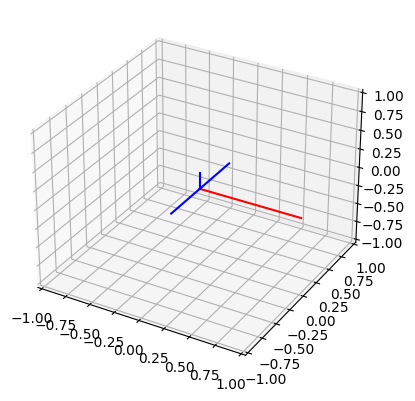

In [67]:

# Darstellung des Parameters

# Vorläufiger Plot der reinen IR
# spa.plot.sh_rms_map(RIR_Mf, title="Raw Spatial Impulse Response (with SH)")

ax = plt.axes(projection='3d')
ax.plot3D([0,1],[0,0],[0,0],'red')
# ax.plot3D([1],[1],[1])
ax.plot3D([0,0],[0,0],[0,top],'blue')
ax.plot3D([0,0],[0,left],[0,0],'blue')
ax.plot3D([0,0],[0,-right],[0,0],'blue')

ax.axes.set_xlim3d(left=-1, right=1) 
ax.axes.set_ylim3d(bottom=-1, top=1) 
ax.axes.set_zlim3d(bottom=-1, top=1)